In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font_scale=1.5)
sns.set_context("notebook", font_scale=1.5)

plt.rcParams["font.size"] = 16

In [2]:
from pathlib import Path

OUTPUT_DIR = Path('/home/nicky/repos/paper-MiyashitaHyperClustering/code/output')

ncc_path = lambda dataset, method: OUTPUT_DIR / 'node-cc' / f'{dataset}' / f'ncc_{method}.tsv'
motifs_path = lambda dataset: OUTPUT_DIR / 'motifs' / f'motifs_{dataset}.tsv'

In [3]:
!mkdir -p images

In [4]:
METHODS = ['opsahl', 'zhou', 'simple', 'proposed']
DATASETS = ['DavisClub', 'cps', 'eE', 'NDCc', 'test']

dfs = {}
for dataset in DATASETS:
    methods_df = []
    for method in METHODS:
        df = pd.read_csv(ncc_path(dataset, method), header=None, names=['node', f'cc_{method}'], sep='\t', index_col='node')
        methods_df.append(df)
    dfs[dataset] = pd.concat(methods_df, axis=1)
len(dfs)

5

In [5]:
dfs[('eE')]

,cc_opsahl,cc_zhou,cc_simple,cc_proposed
node,,,,
1,0.552916,0.583544,0.384058,0.248535
4,0.669783,0.592474,0.466667,0.286139
117,0.769389,0.536266,0.462195,0.275753
129,0.752417,0.540981,0.523810,0.346464
51,0.717630,0.586017,0.474286,0.318468
...,...,...,...,...
139,0.333333,0.238095,0.333333,0.087955
94,0.500000,0.500000,0.500000,0.305556
81,1.000000,0.333333,1.000000,0.949678


## クラスタ係数のヒストグラム

DavisClub
cps
eE
NDCc
test


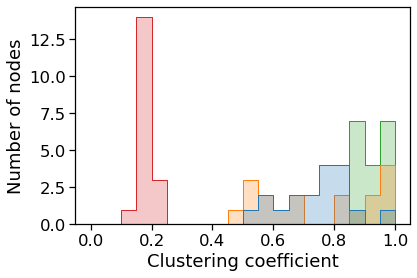

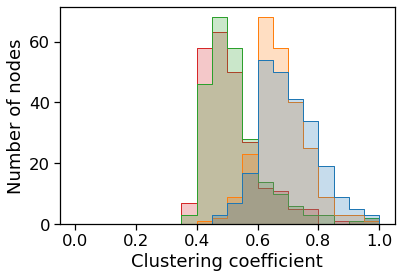

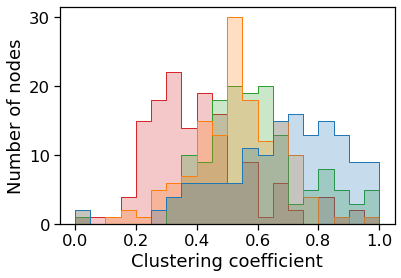

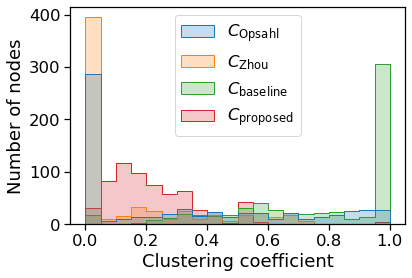

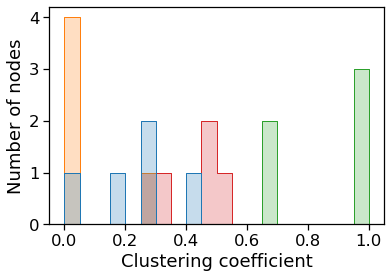

In [6]:
cols = [f'cc_{method}' for method in METHODS]

bins = np.linspace(0, 1, 21)
for dataset in DATASETS:
    print(dataset)
    fig, ax = plt.subplots()
    df = dfs[dataset][cols].rename(columns={'cc_opsahl': '$C_\mathrm{Opsahl}$', 'cc_zhou': '$C_\mathrm{Zhou}$', 'cc_proposed': '$C_\mathrm{proposed}$', 'cc_simple': '$C_\mathrm{baseline}$'})
#     print(df.columns)
    sns.histplot(df, element='step', bins=bins)
#     df.plot.hist(histtype='step', bins=bins, ax=ax)
    ax.set_xlabel('Clustering coefficient')
    ax.set_ylabel('Number of nodes')
#     fig.legend(loc='upper center')
    sns.move_legend(ax, 'upper center')
    if dataset != 'NDCc':
        ax.get_legend().remove()
    plt.savefig(f'images/hist_{dataset}.pdf', bbox_inches='tight')

DavisClub
cps
eE
NDCc
test


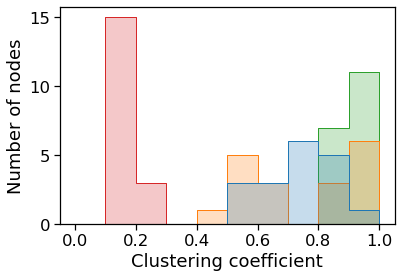

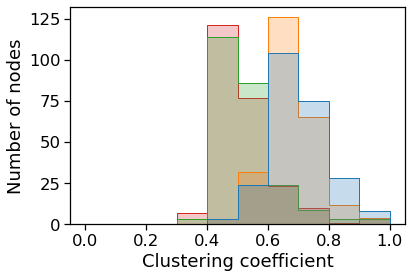

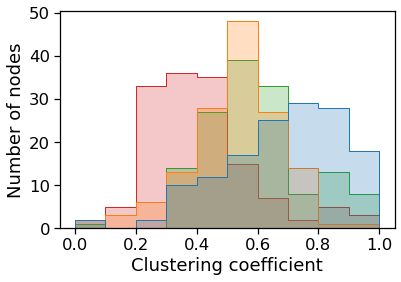

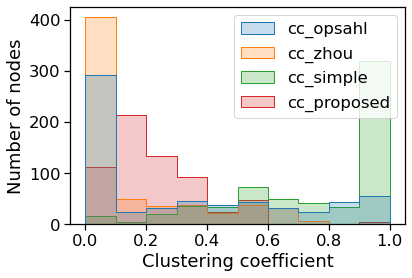

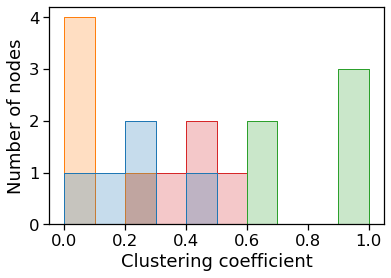

In [7]:
bins = np.linspace(0, 1, 11)
for dataset in DATASETS:
    print(dataset)
    fig, ax = plt.subplots()
    sns.histplot(dfs[dataset], element='step', bins=bins)
    ax.set_xlabel('Clustering coefficient')
    ax.set_ylabel('Number of nodes')
    
#     ax.legend(labels=['Proposed', 'Zhou', 'Opsahl'])
    if dataset != 'NDCc':
        ax.get_legend().remove()

## クラスタ係数の散布図

DavisClub
cps
eE
NDCc
test


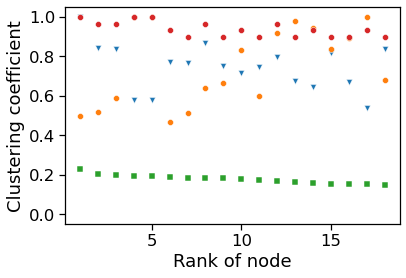

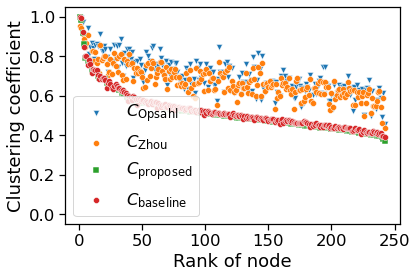

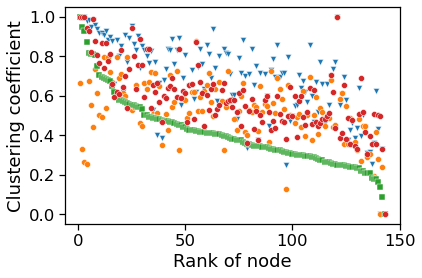

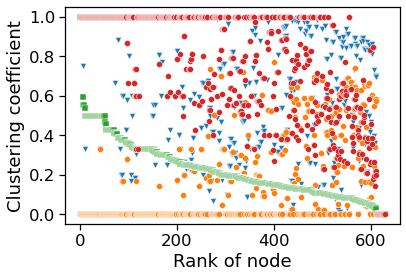

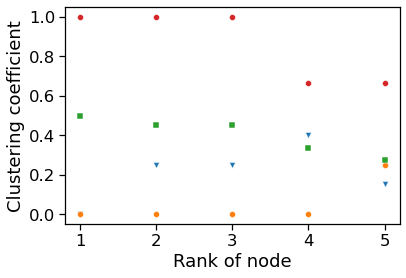

In [8]:
for dataset in DATASETS:
    print(dataset)
    plt.figure()
    x = np.arange(1, len(dfs[dataset])+1)
    sorted_df = dfs[dataset].sort_values(by='cc_proposed', ascending=False)
    sorted_df['rank'] = x
    sns.scatterplot(data=sorted_df, x='rank', y='cc_opsahl', label='$C_\mathrm{Opsahl}$', marker='v')
    sns.scatterplot(data=sorted_df, x='rank', y='cc_zhou', label='$C_\mathrm{Zhou}$', marker='o')
    sns.scatterplot(data=sorted_df, x='rank', y='cc_proposed', label='$C_\mathrm{proposed}$', marker='s')
    sns.scatterplot(data=sorted_df, x='rank', y='cc_simple', label='$C_\mathrm{baseline}$')
    
    leg = plt.legend()
    if dataset != 'cps':
        leg.remove()
    plt.ylabel('Clustering coefficient')
    plt.xlabel('Rank of node')
    plt.ylim(-0.05, 1.05)

## モチーフの数

In [9]:
motifs_dfs = {}
for dataset in DATASETS:
    df = pd.read_csv(motifs_path(dataset), header=None, names=['motif', 'count'], sep='\t', index_col='motif')
    motifs_dfs[dataset] = df
df = pd.concat(motifs_dfs, axis=1)
df

,DavisClub,cps,eE,NDCc,test
,count,count,count,count,count
motif,,,,,
"((1, 2), (1, 2, 3))",0,133,19,30,0
"((1, 2), (1, 2, 3), (1, 3))",0,361,102,1,0
"((1, 2), (1, 2, 3), (1, 3), (2, 3))",0,4101,191,0,0
"((1, 2), (1, 3))",0,301257,7715,18,0
"((1, 2), (1, 3), (2, 3))",0,81989,1156,0,0
"((1, 2, 3),)",4,5,5,61,2


DavisClub
cps
eE
NDCc
test


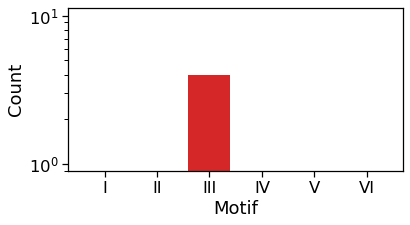

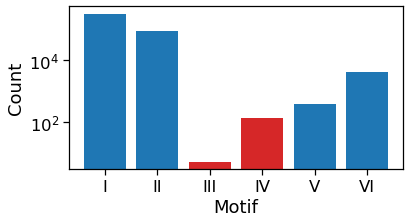

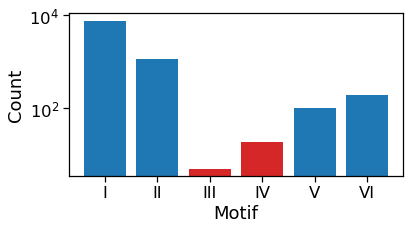

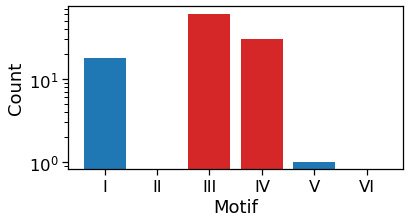

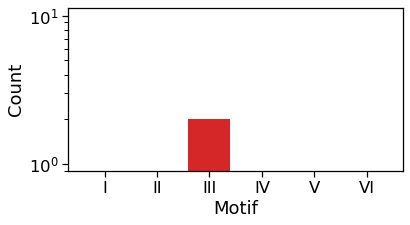

In [10]:
col = ['((1, 2), (1, 3))', '((1, 2), (1, 3), (2, 3))', '((1, 2, 3),)', '((1, 2), (1, 2, 3))', '((1, 2), (1, 2, 3), (1, 3))', '((1, 2), (1, 2, 3), (1, 3), (2, 3))']
x = [1, 2, 3, 4, 5, 6]
xlabels = ['I', 'II', 'III', 'IV', 'V', 'VI']
colors = ['tab:red' if i == 3 or i == 4 else 'tab:blue' for i in x]

for dataset in DATASETS:
    print(dataset)
    fig, ax = plt.subplots(figsize=(6, 3))
#     df[(dataset, 'count')][col].plot.bar()

    y = df[(dataset, 'count')][col]
    plt.bar(x, y, color=colors)
    plt.xticks(x, xlabels)
    plt.yscale('log')
    plt.ylabel('Count')
    plt.xlabel('Motif')
    plt.savefig(f'images/motifs_{dataset}.pdf', bbox_inches='tight')

## 散布図


DavisClub
cps
eE
NDCc
test


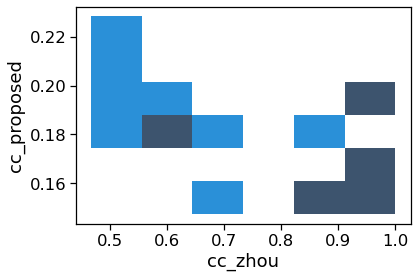

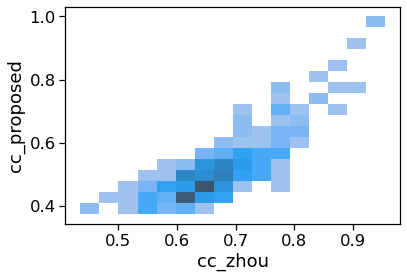

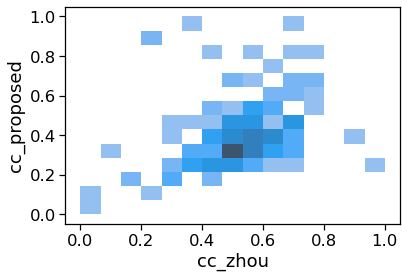

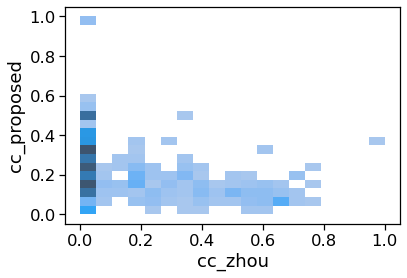

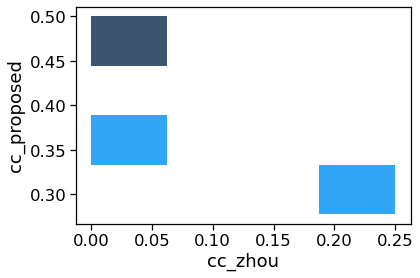

In [11]:
cols = [f'cc_{method}' for method in METHODS]

bins = np.linspace(0, 1, 21)
for dataset in DATASETS:
    print(dataset)
    fig, ax = plt.subplots()
    sns.histplot(dfs[dataset][cols], y='cc_proposed', x='cc_zhou')
#     ax.set_xlabel('Clustering coefficient')
#     ax.set_ylabel('Number of nodes')
    
#     ax.legend(labels=['Proposed', 'Zhou', 'Opsahl'])
#     if dataset != 'NDCc':
#         ax.get_legend().remove()

DavisClub
cps
eE
NDCc
test


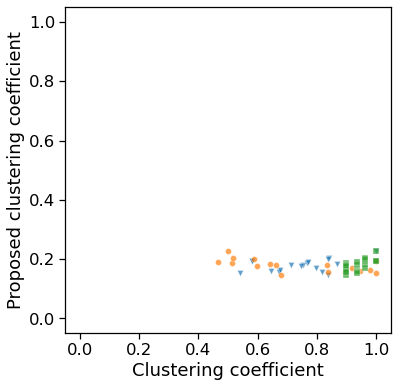

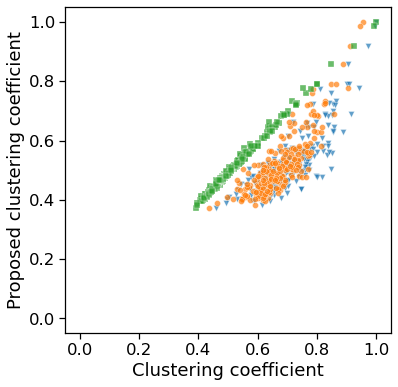

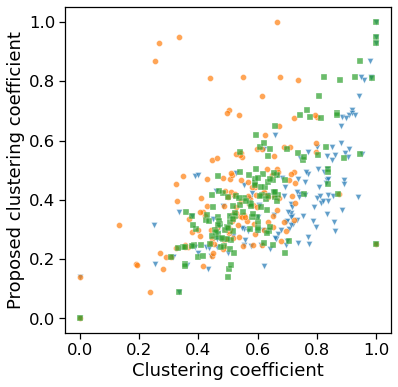

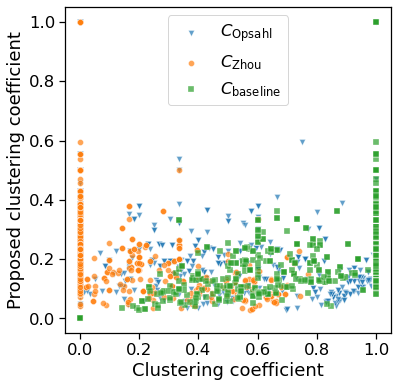

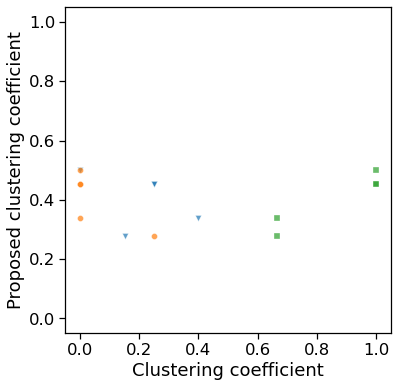

In [12]:
cols = [f'cc_{method}' for method in METHODS]

bins = np.linspace(0, 1, 21)
for dataset in DATASETS:
    print(dataset)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.scatterplot(data=dfs[dataset], y='cc_proposed', x='cc_opsahl', label='$C_\mathrm{Opsahl}$', marker='v', alpha=0.7)
    sns.scatterplot(data=dfs[dataset], y='cc_proposed', x='cc_zhou', label='$C_\mathrm{Zhou}$', marker='o', alpha=0.7)
    sns.scatterplot(data=dfs[dataset], y='cc_proposed', x='cc_simple', label='$C_\mathrm{baseline}$', marker='s', alpha=0.7)
    ax.set_xlabel('Clustering coefficient')
#     ax.set_ylabel('Number of nodes')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_ylabel('Proposed clustering coefficient')
    ax.set_aspect('equal', adjustable='box')
#     ax.legend(labels=['Proposed', 'Zhou', 'Opsahl'])
    if dataset != 'NDCc':
        ax.get_legend().remove()
    fig.savefig(f'images/scatter_{dataset}.pdf', bbox_inches='tight')

In [13]:
from IPython.display import display

for dataset in DATASETS:
    print(dataset)
    display(dfs[dataset].corr(method='pearson'))

DavisClub


,cc_opsahl,cc_zhou,cc_simple,cc_proposed
cc_opsahl,1.000000,-0.766161,0.047646,0.411446
cc_zhou,-0.766161,1.000000,0.077140,-0.513287
cc_simple,0.047646,0.077140,1.000000,0.699829
cc_proposed,0.411446,-0.513287,0.699829,1.000000


cps


,cc_opsahl,cc_zhou,cc_simple,cc_proposed
cc_opsahl,1.000000,0.966669,0.820012,0.826986
cc_zhou,0.966669,1.000000,0.833339,0.839674
cc_simple,0.820012,0.833339,1.000000,0.997544
cc_proposed,0.826986,0.839674,0.997544,1.000000


eE


,cc_opsahl,cc_zhou,cc_simple,cc_proposed
cc_opsahl,1.000000,0.614575,0.726110,0.702315
cc_zhou,0.614575,1.000000,0.345698,0.346122
cc_simple,0.726110,0.345698,1.000000,0.782780
cc_proposed,0.702315,0.346122,0.782780,1.000000


NDCc


,cc_opsahl,cc_zhou,cc_simple,cc_proposed
cc_opsahl,1.000000,0.713532,-0.159546,-0.358666
cc_zhou,0.713532,1.000000,-0.321383,-0.407638
cc_simple,-0.159546,-0.321383,1.000000,0.598760
cc_proposed,-0.358666,-0.407638,0.598760,1.000000


test


,cc_opsahl,cc_zhou,cc_simple,cc_proposed
cc_opsahl,1.000000,-0.216326,-0.410544,-0.400150
cc_zhou,-0.216326,1.000000,-0.612372,-0.763473
cc_simple,-0.410544,-0.612372,1.000000,0.950305
cc_proposed,-0.400150,-0.763473,0.950305,1.000000


In [14]:
from IPython.display import display

for dataset in DATASETS:
    print(dataset)
    display(dfs[dataset].corr(method='spearman'))

DavisClub


,cc_opsahl,cc_zhou,cc_simple,cc_proposed
cc_opsahl,1.000000,-0.758408,0.118578,0.359504
cc_zhou,-0.758408,1.000000,0.073417,-0.474910
cc_simple,0.118578,0.073417,1.000000,0.678051
cc_proposed,0.359504,-0.474910,0.678051,1.000000


cps


,cc_opsahl,cc_zhou,cc_simple,cc_proposed
cc_opsahl,1.000000,0.957514,0.799245,0.807593
cc_zhou,0.957514,1.000000,0.802910,0.809284
cc_simple,0.799245,0.802910,1.000000,0.995979
cc_proposed,0.807593,0.809284,0.995979,1.000000


eE


,cc_opsahl,cc_zhou,cc_simple,cc_proposed
cc_opsahl,1.000000,0.516108,0.713738,0.694575
cc_zhou,0.516108,1.000000,0.314454,0.444052
cc_simple,0.713738,0.314454,1.000000,0.723566
cc_proposed,0.694575,0.444052,0.723566,1.000000


NDCc


,cc_opsahl,cc_zhou,cc_simple,cc_proposed
cc_opsahl,1.000000,0.753541,-0.345045,-0.417092
cc_zhou,0.753541,1.000000,-0.521695,-0.514624
cc_simple,-0.345045,-0.521695,1.000000,0.690639
cc_proposed,-0.417092,-0.514624,0.690639,1.000000


test


,cc_opsahl,cc_zhou,cc_simple,cc_proposed
cc_opsahl,1.000000,-0.362738,-0.296174,-0.368421
cc_zhou,-0.362738,1.000000,-0.612372,-0.725476
cc_simple,-0.296174,-0.612372,1.000000,0.888523
cc_proposed,-0.368421,-0.725476,0.888523,1.000000
